In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
from iso3166 import countries

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

import pycountry

sns.set_context("talk")
plt.style.use('ggplot')
mpl.rcParams['axes.labelpad']='20'

### data en https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HTTWYL

In [104]:
df = pd.read_csv("../datos/protests.tab", sep='\t')
df = df[df["protest"] ==1.0]
df["ccode"] = df["ccode"].astype("int32")
df = df[df["country"] == "Colombia"]

columnas = ["year", "protesterviolence", 'location',
       'participants', 'protesteridentity', 'protesterdemand1', 'stateresponse1']
df = df.loc[:,columnas]
df.head(50)

,year,protesterviolence,location,participants,protesteridentity,protesterdemand1,stateresponse1
998,1990,0.0,cartagena,5000,workers,"political behavior, process",ignore
999,1990,0.0,national level,1000,workers and students,"political behavior, process",crowd dispersal
1000,1990,0.0,medellin,3000,Catholics,"political behavior, process",ignore
1001,1990,0.0,bogota,15000,employees of telecommunications company telec...,"political behavior, process",ignore
1002,1990,0.0,national level,14000,banana workers,"political behavior, process",ignore
1003,1990,0.0,national level strike and Bogota demonstrat...,10000,workers,"price increases, tax policy",ignore
1004,1991,0.0,national level,200000,teachers,police brutality,accomodation
1005,1991,0.0,southwestern Colombia,30000,farm workers,"political behavior, process",ignore
1006,1991,0.0,national level,30000,court employees,"political behavior, process",ignore
1007,1991,0.0,national level,400000,state workers,"political behavior, process",ignore


In [102]:
df.shape

(133, 7)

Text(0.5, 1.0, 'Razones para marchar')

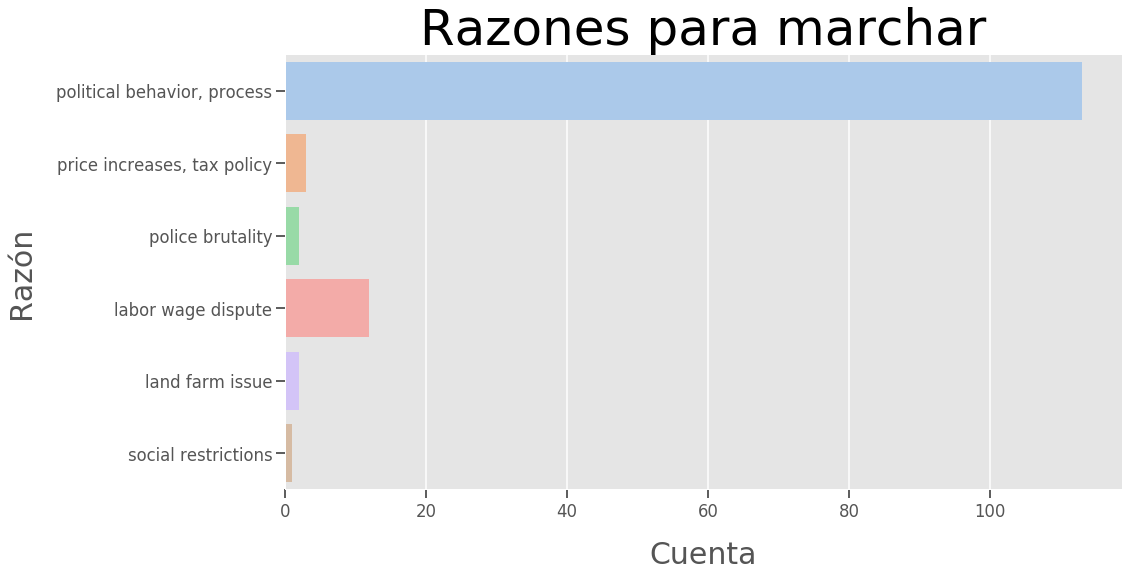

In [32]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y="protesterdemand1", data=df, orient="h", palette="pastel")
ax.set_xlabel("Cuenta",fontsize=30)
ax.set_ylabel("Razón",fontsize=30)
ax.set_title("Razones para marchar",fontsize=50)

Text(0.5, 1.0, 'Respuestas del Estado frente a la marcha')

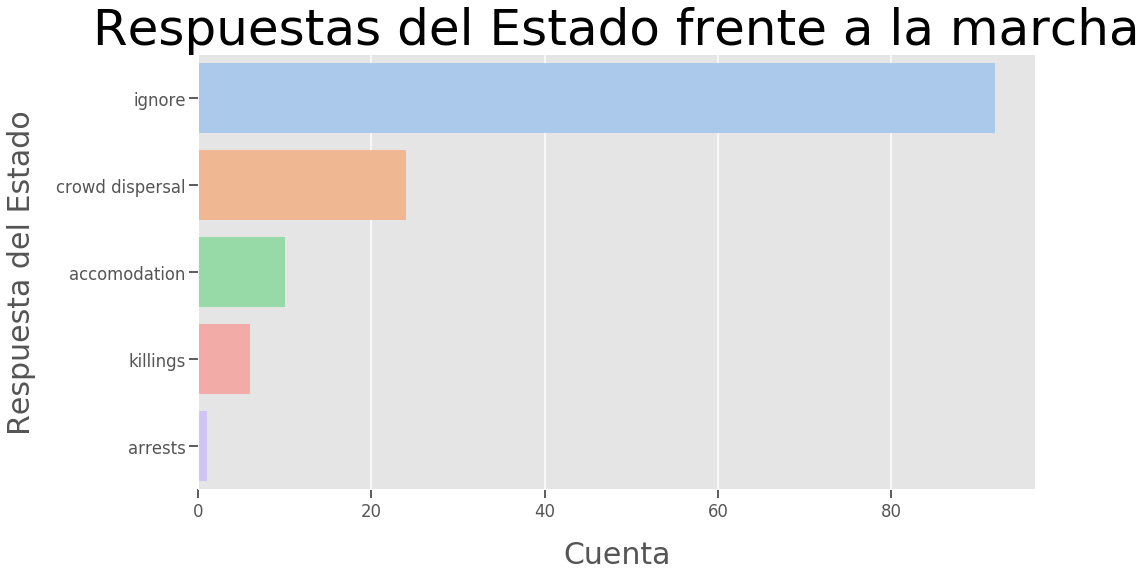

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y="stateresponse1", data=df, orient="h", palette="pastel")
ax.set_xlabel("Cuenta",fontsize=30)
ax.set_ylabel("Respuesta del Estado",fontsize=30)
ax.set_title("Respuestas del Estado frente a la marcha",fontsize=50)

In [117]:
def si_no(row):
    if row["protesterviolence"] == 1:
        row["protesterviolence"] = "Si"
    else:
        row["protesterviolence"] = "No"
    return row
        

In [120]:
df_si_no = df.copy()
df_si_no = df_si_no.apply(si_no, axis=1)
df_si_no.head(50)
sums = df_si_no.protesterviolence.groupby(df_si_no.protesterviolence).count()

In [121]:
sums

protesterviolence
No    122
Si     11
Name: protesterviolence, dtype: int64

In [123]:
import plotly.graph_objects as go

labels = sums.index
values = [91.7,8.3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title="Violencia por parte de los protestantes",
    font=dict(
        family="Courier New, monospace",
        size=25,
        color="#7f7f7f"
    )
)
fig.show()

[Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

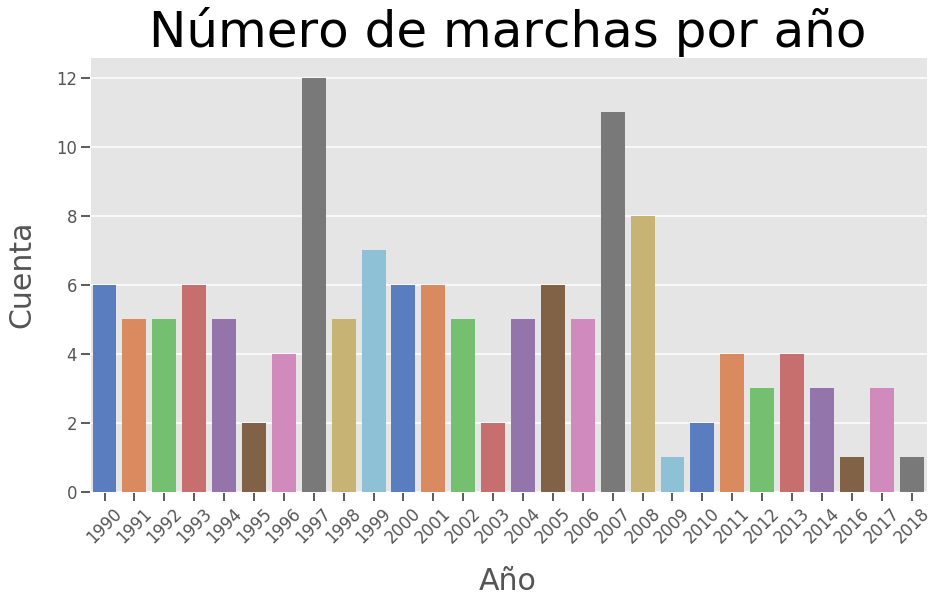

In [59]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="year", data=df, palette="muted")
ax.set_xlabel("Año",fontsize=30)
ax.set_ylabel("Cuenta",fontsize=30)
ax.set_title("Número de marchas por año",fontsize=50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [73]:
import collections
from stop_words import get_stop_words
from wordcloud import WordCloud
stopwords = get_stop_words('en')

In [74]:
all_text = ""
for i, protest in df.iterrows():
    all_text += str(protest["protesteridentity"]) + " "

wordcount = collections.defaultdict(int)
for word in all_text.lower().split():

    if word not in stopwords:
        wordcount[word] += 1

wordcount


defaultdict(int,
            {'workers': 44,
             'students': 7,
             'catholics': 1,
             'employees': 6,
             'telecommunications': 1,
             'company': 2,
             'telecom': 1,
             'banana': 2,
             'teachers': 13,
             'farm': 1,
             'court': 2,
             'state': 8,
             'residents': 4,
             'villa': 1,
             'del': 1,
             'prado': 1,
             'region': 1,
             'telephone,': 1,
             'energy': 1,
             'water': 1,
             'enterprises,': 1,
             'civil': 2,
             'registry': 1,
             'office': 1,
             'bank': 1,
             'telephone': 1,
             'secret': 1,
             'judges': 1,
             'indians': 9,
             'peasants': 9,
             'inhabitants': 1,
             'bogota': 2,
             's': 1,
             'ciudad': 1,
             'bolivar': 1,
             'district': 1,
         

In [93]:
def colombia_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    red ="hsl(0, 100%, 50%)"
    blue = "hsl(245, 100%, 50%)"
    yellow = "hsl(58, 71%, 50%)"
    colors = [yellow, blue, red]
    return random.choice(colors)

In [78]:
wc = WordCloud(background_color="white",width=1500, height=1000).generate_from_frequencies(wordcount)

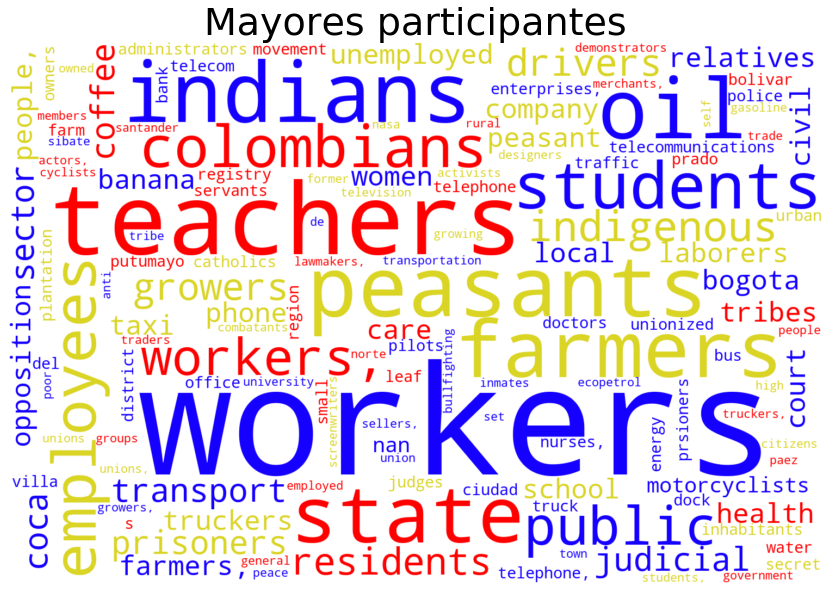

In [99]:
fig = plt.figure(figsize=(15,10))
plt.imshow(wc.recolor(color_func=colombia_color_func, random_state=3), interpolation="bilinear")
plt.title("Mayores participantes", fontsize=38)
plt.axis("off")
plt.show()